In [ ]:
pip install textblob

In [ ]:
pip install tweepy

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string

In [2]:
from tweepy import OAuthHandler
  
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = '68ifCM8OZQmCE1BzBY3df6Uzm'
        consumer_secret = 'o6f6L48gNrErLyJmHwhJzHOVZyO8VgiRBGrD8u4pEjKy9SRK6K'
        access_token = '912151897519226880-GxP1EmngZjix0RnMcxwZlamzhkmVRNg'
        access_token_secret = 'PZ1nEvkpYRHkkwWj5BprMSGBJBdg7Q30cZoYFlIalrxiv'
  
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
  
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
  
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
  
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
  
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
  
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
  
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
  
            # return parsed tweets
            return tweets
  
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

Please enter keyword or hashtag to search: PS1
Please enter how many tweets to analyze: 100

Positive tweets percentage: 41.86046511627907 %

Negative tweets percentage: 6.976744186046512 %

Neutral tweets percentage: 51.16279069767442 %        


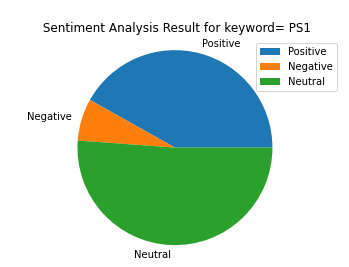



Positive tweets:
RT @BoxOfficeSouth2: Top 10 Tamil Movies Worldwide Gross - 2022

1) #PS1 : 495.60 Cr
2) #Vikram : 430.60 Cr
3) #Beast : 235.90 Cr
4) #Valim…
NEW Twitch Schedule! 🎤 (**link below**)

SO excited for this week!! Parappa &amp; the Nana-On Sha PS1 music trio tonigh… https://t.co/KdpYtFlPz7
@music_by_KoY pior parcero, se nao fosse pirataria nao teriamos live, jogo de ps1, quantos filme nois só te acesso… https://t.co/8LV0VgVKqI
RT @dt_next: Mani Ratnam’s epic movie Ponniyin Selvan: 1 has smashed box-office records as it stands as one of the biggest Tamil movies of…
@ChaosSpreads97 @16bitnostalgia PS1 version is perfect
@kgfch2waiting @CineTimeCanada @saruban11 Guys that's the whole point. Distributors are charging way too high. KW t… https://t.co/3bKTvpn7tV
@16bitnostalgia The PS1 version plays happily in Tate mode on the #PSVita 

Recommended (although use an external D… https://t.co/N9YiAchKNx
RT @offlmrmultiplex: Here's the top 10 film of 2022💥🥁

1. #PonniyinSelvan1 *
2

In [3]:
 def main():
    # creating object of TwitterClient Class
    api = TwitterClient()

    def percentage(part,whole):
      return 100 * float(part)/float(whole)
    class color:
      BOLD='\033[1m'
      END='\033[0m'
   
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Please enter how many tweets to analyze: "))

    # calling function to get 
    tweets = api.get_tweets(query = keyword, count = noOfTweet) 

    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    b=len(ptweets)
    # percentage of positive tweets
    print("\nPositive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    a=len(ntweets)
    # percentage of negative tweets
    print("\nNegative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    netweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    x=len(netweets)
    print("\nNeutral tweets percentage: {} % \
        ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))
    
    y = np.array([b, a, x])
    mylabels = ["Positive", "Negative", "Neutral"]

    #plt.pie(y, labels = mylabels)
    # Plot
    plt.pie(y, labels=mylabels)
    plt.legend(mylabels)
    plt.axis('equal')
    plt.title("\n Sentiment Analysis Result for keyword= "+keyword+"" )
    plt.axis('equal')
    plt.show()

    # printing first 5 positive tweets
    print(color.BOLD+"\n\nPositive tweets:"+color.END)
    for tweet in ptweets[:10]:
        print(tweet['text'])
  
    # printing first 5 negative tweets
    print(color.BOLD+"\n\nNegative tweets:"+color.END)
    for tweet in ntweets[:10]:
        print(tweet['text'])
  
    # printing first 5 neutral tweets
    print(color.BOLD+"\n\nNeutral tweets:"+color.END)
    for tweet in netweets[:10]:
        print(tweet['text'])

if __name__ == "__main__":
    # calling main function
     main()